In [ ]:
#import
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#PATH dove andare a leggere e a scrivere
PATH_TO_WRITE_ETL = "./dataset_modificato/"
PATH_FROM_READ_ETL = "./dataset_originale/"
PATH_FROM_READ_ANALYSIS = "./dataset_modificato/" 

In [ ]:
## Grafico a linea, numero di squadre totali che hanno partecipato ai campionati

df_tournaments = pd.read_csv(PATH_FROM_READ_ETL + "/tournaments.csv")

plt.figure(figsize=(15,8))
plt.plot(df_tournaments['year'], df_tournaments['count_teams'])
plt.xlabel("anno")
plt.ylabel("numero di squadre")
plt.title('NUMERO DI PARTECIPAZIONI AI CAMPIONATI')

In [ ]:
## Numero di cartellini totali per nazioni

df_bookings = pd.read_csv(PATH_TO_WRITE_ETL + "/bookings.csv")

df_test = df_bookings[['team_name','yellow_card','red_card']]
df_group = df_test.groupby(['team_name'])['yellow_card','red_card'].sum()
cols=['yellow_card','red_card']
df_group['sum'] = df_group[cols].sum(axis=1)
df_group.sort_values(by=['sum'], ascending = False, inplace = True)
df_group.drop(['yellow_card', 'red_card'], axis=1, inplace = True)

df_group.plot(kind='bar', figsize=(15,8))
plt.legend('')
plt.xlabel("squadre")
plt.ylabel("numero di cartellini")
plt.title('NUMERO DI CARTELLINI TOTALI PER NAZIONE')

In [ ]:
## Paesi e numero di volte che hanno ospitato i campionati
df_tmap = pd.read_csv('./etl_Simone/country_tournaments.csv')

fig = px.choropleth(df_tmap,
                    title='PAESI CHE HANNO OSPITATO I CAMPIONATI',
                    locations='host_country', 
                    locationmode="country names", 
                    color='numero_volte',
                    )
fig.update_layout(coloraxis_colorbar=dict(
                title="numero di volte",
                ticktext=["2", "1"],
                dtick=1
                ))
fig.show()


In [ ]:
## più alta posizione raggiunta dalle nazioni tra tutti i campionati
df_gmap = pd.read_csv('./etl_Simone/team_stage.csv')

fig = px.choropleth(df_gmap,
                    title='PANORAMICA SUI POSIZIONAMENTI MIGLIORI RAGGIUNTI',
                    locations='team_name', 
                    locationmode="country names", 
                    color='stage_name',
                    )

fig.show()

In [ ]:
## CORRELAZIONE GOAL-POSIZIONE
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

# 1930
df_tg_1930 = df_team_goals[df_team_goals.tournament_id.eq('WC-1930')].reset_index()
df_tg_1930 = df_tg_1930.drop(['index'], axis=1)
df_tg_1930 = df_tg_1930[['stage_number', 'goals', 'goal_subiti']]
plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1930.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1930', fontsize = 20)
plt.show()

# 1934
df_tg_1934 = df_team_goals[df_team_goals.tournament_id.eq('WC-1934')].reset_index()
df_tg_1934 = df_tg_1934.drop(['index'], axis=1)
df_tg_1934 = df_tg_1934[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1934.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1934', fontsize = 20)
plt.show()

# 1938
df_tg_1938 = df_team_goals[df_team_goals.tournament_id.eq('WC-1938')].reset_index()
df_tg_1938 = df_tg_1938.drop(['index'], axis=1)
df_tg_1938 = df_tg_1938[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1938.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1938', fontsize = 20)
plt.show()

# 1950
df_tg_1950 = df_team_goals[df_team_goals.tournament_id.eq('WC-1950')].reset_index()
df_tg_1950 = df_tg_1950.drop(['index'], axis=1)
df_tg_1950 = df_tg_1950[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1950.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1950', fontsize = 20)
plt.show()

# 1954
df_tg_1954 = df_team_goals[df_team_goals.tournament_id.eq('WC-1954')].reset_index()
df_tg_1954 = df_tg_1954.drop(['index'], axis=1)
df_tg_1954 = df_tg_1954[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1954.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1954', fontsize = 20)
plt.show()

# 1958
df_tg_1958 = df_team_goals[df_team_goals.tournament_id.eq('WC-1958')].reset_index()
df_tg_1958 = df_tg_1958.drop(['index'], axis=1)
df_tg_1958 = df_tg_1958[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1934.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1958', fontsize = 20)
plt.show()

# 1962
df_tg_1962 = df_team_goals[df_team_goals.tournament_id.eq('WC-1962')].reset_index()
df_tg_1962 = df_tg_1962.drop(['index'], axis=1)
df_tg_1962 = df_tg_1962[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1962.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1962', fontsize = 20)
plt.show()

# 1966
df_tg_1966 = df_team_goals[df_team_goals.tournament_id.eq('WC-1966')].reset_index()
df_tg_1966 = df_tg_1966.drop(['index'], axis=1)
df_tg_1966 = df_tg_1966[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1966.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1966', fontsize = 20)
plt.show()

# 1970
df_tg_1970 = df_team_goals[df_team_goals.tournament_id.eq('WC-1970')].reset_index()
df_tg_1970 = df_tg_1970.drop(['index'], axis=1)
df_tg_1970 = df_tg_1970[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1970.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1970', fontsize = 20)
plt.show()

# 1974
df_tg_1974 = df_team_goals[df_team_goals.tournament_id.eq('WC-1974')].reset_index()
df_tg_1974 = df_tg_1974.drop(['index'], axis=1)
df_tg_1974 = df_tg_1974[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1974.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1974', fontsize = 20)

# 1978
df_tg_1978 = df_team_goals[df_team_goals.tournament_id.eq('WC-1978')].reset_index()
df_tg_1978 = df_tg_1978.drop(['index'], axis=1)
df_tg_1978 = df_tg_1978[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1978.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1978', fontsize = 20)
plt.show()

# 1982
df_tg_1982 = df_team_goals[df_team_goals.tournament_id.eq('WC-1982')].reset_index()
df_tg_1982 = df_tg_1982.drop(['index'], axis=1)
df_tg_1982 = df_tg_1982[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1982.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1982', fontsize = 20)
plt.show()

# 1986
df_tg_1986 = df_team_goals[df_team_goals.tournament_id.eq('WC-1986')].reset_index()
df_tg_1986 = df_tg_1986.drop(['index'], axis=1)
df_tg_1986 = df_tg_1986[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1986.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1986', fontsize = 20)
plt.show()

# 1990
df_tg_1990 = df_team_goals[df_team_goals.tournament_id.eq('WC-1990')].reset_index()
df_tg_1990 = df_tg_1990.drop(['index'], axis=1)
df_tg_1990 = df_tg_1990[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1990.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1990', fontsize = 20)
plt.show()

# 1994
df_tg_1994 = df_team_goals[df_team_goals.tournament_id.eq('WC-1994')].reset_index()
df_tg_1994 = df_tg_1994.drop(['index'], axis=1)
df_tg_1994 = df_tg_1994[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1994.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1994', fontsize = 20)
plt.show()

# 1998
df_tg_1998 = df_team_goals[df_team_goals.tournament_id.eq('WC-1998')].reset_index()
df_tg_1998 = df_tg_1998.drop(['index'], axis=1)
df_tg_1998 = df_tg_1998[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_1998.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('1998', fontsize = 20)
plt.show()

# 2002
df_tg_2002 = df_team_goals[df_team_goals.tournament_id.eq('WC-2002')].reset_index()
df_tg_2002 = df_tg_2002.drop(['index'], axis=1)
df_tg_2002 = df_tg_2002[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_2002.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('2002', fontsize = 20)
plt.show()

# 2006
df_tg_2006 = df_team_goals[df_team_goals.tournament_id.eq('WC-2006')].reset_index()
df_tg_2006 = df_tg_2006.drop(['index'], axis=1)
df_tg_2006 = df_tg_2006[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_2006.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('2006', fontsize = 20)
plt.show()

# 2010
df_tg_2010 = df_team_goals[df_team_goals.tournament_id.eq('WC-2010')].reset_index()
df_tg_2010 = df_tg_2010.drop(['index'], axis=1)
df_tg_2010 = df_tg_2010[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_2010.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('2010', fontsize = 20)
plt.show()

# 2014
df_tg_2014 = df_team_goals[df_team_goals.tournament_id.eq('WC-2014')].reset_index()
df_tg_2014 = df_tg_2014.drop(['index'], axis=1)
df_tg_2014 = df_tg_2014[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_2014.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('2014', fontsize = 20)
plt.show()

# 2018
df_tg_2018 = df_team_goals[df_team_goals.tournament_id.eq('WC-2018')].reset_index()
df_tg_2018 = df_tg_2018.drop(['index'], axis=1)
df_tg_2018 = df_tg_2018[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_tg_2018.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('2018', fontsize = 20)
plt.show()

# Tutti gli anni
df_team_goals = df_team_goals[['stage_number', 'goals', 'goal_subiti']]

plt.figure(figsize=(4,2))
sns.heatmap(df_team_goals.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Tutti gli anni', fontsize = 20)
plt.show()

FORECASTING (SARIMAX MODEL)

In [ ]:
## BRASILE
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_bra = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_bra.drop(['index'], axis=1, inplace=True)
df_team_goals_bra.set_index(df_team_goals_bra['year'], inplace=True)

df_team_goals_bra.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra.loc[1946]=[None, None, None, None, None, None, -1, None]

df_team_goals_bra = df_team_goals_bra.sort_index(ascending=True)
df_team_goals_bra = df_team_goals_bra.interpolate()
df_team_goals_bra.index = pd.PeriodIndex(df_team_goals_bra.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_bra['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_bra['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# CARTELLINI
df_team_goals_bra2 = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_bra2.drop(['index'], axis=1, inplace=True)
df_team_goals_bra2.set_index(df_team_goals_bra2['year'], inplace=True)

df_team_goals_bra2.loc[1942]=[None, None, None, 0, None, None, None, None]
df_team_goals_bra2.loc[1946]=[None, None, None, 0, None, None, None, None]

df_team_goals_bra2 = df_team_goals_bra2.sort_index(ascending=True)
df_team_goals_bra2 = df_team_goals_bra2.interpolate()
df_team_goals_bra2.index = pd.PeriodIndex(df_team_goals_bra2.index, freq='4Y')

endog3 = df_team_goals_bra2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig3, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

In [ ]:
## ARGENTINA
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_arg = df_team_goals[df_team_goals.team_name.eq('Argentina')].reset_index()
df_team_goals_arg.drop(['index'], axis=1, inplace=True)
df_team_goals_arg.set_index(df_team_goals_arg['year'], inplace=True)

df_team_goals_arg.loc[1938]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[1950]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[1954]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[1970]=[None, None, None, None, None, None, -1, None]

df_team_goals_arg = df_team_goals_arg.sort_index(ascending=True)
df_team_goals_arg = df_team_goals_arg.interpolate()
df_team_goals_arg.index = pd.PeriodIndex(df_team_goals_arg.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_arg['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_arg['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# CARTELLINI
df_team_goals_arg2 = df_team_goals[df_team_goals.team_name.eq('Argentina')].reset_index()
df_team_goals_arg2.drop(['index'], axis=1, inplace=True)
df_team_goals_arg2.set_index(df_team_goals_arg2['year'], inplace=True)

df_team_goals_arg2.loc[1938]=[None, None, None, 0, None, None, None, None]
df_team_goals_arg2.loc[1942]=[None, None, None, 0, None, None, None, None]
df_team_goals_arg2.loc[1946]=[None, None, None, 0, None, None, None, None]
df_team_goals_arg2.loc[1950]=[None, None, None, 0, None, None, None, None]
df_team_goals_arg2.loc[1954]=[None, None, None, 0, None, None, None, None]
df_team_goals_arg2.loc[1970]=[None, None, None, 0, None, None, None, None]

df_team_goals_arg2 = df_team_goals_arg2.sort_index(ascending=True)
df_team_goals_arg2 = df_team_goals_arg2.interpolate()
df_team_goals_arg2.index = pd.PeriodIndex(df_team_goals_arg2.index, freq='4Y')

endog3 = df_team_goals_arg2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig3, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

In [ ]:
## FRANCIA
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_fra = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_fra.drop(['index'], axis=1, inplace=True)
df_team_goals_fra.set_index(df_team_goals_fra['year'], inplace=True)

df_team_goals_fra.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1950]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1962]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1970]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1974]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1990]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[1994]=[None, None, None, None, None, None, -1, None]

df_team_goals_fra = df_team_goals_fra.sort_index(ascending=True)
df_team_goals_fra = df_team_goals_fra.interpolate()
df_team_goals_fra.index = pd.PeriodIndex(df_team_goals_fra.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_fra['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_fra['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# CARTELLINI
df_team_goals_fra2 = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_fra2.drop(['index'], axis=1, inplace=True)
df_team_goals_fra2.set_index(df_team_goals_fra2['year'], inplace=True)

df_team_goals_fra2.loc[1942]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1946]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1950]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1962]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1970]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1974]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1990]=[None, None, None, 0, None, None, None, None]
df_team_goals_fra2.loc[1994]=[None, None, None, 0, None, None, None, None]

df_team_goals_fra2 = df_team_goals_fra2.sort_index(ascending=True)
df_team_goals_fra2 = df_team_goals_fra2.interpolate()
df_team_goals_fra2.index = pd.PeriodIndex(df_team_goals_fra2.index, freq='4Y')

endog3 = df_team_goals_fra2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig3, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

In [ ]:
## INGHILTERRA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR

df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_eng = df_team_goals[df_team_goals.team_name.eq('England')].reset_index()
df_team_goals_eng.drop(['index'], axis=1, inplace=True)
df_team_goals_eng.set_index(df_team_goals_eng['year'], inplace=True)

df_team_goals_eng.loc[1930]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1934]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1938]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1974]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1978]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[1994]=[None, None, None, None, None, None, -1, None]

df_team_goals_eng = df_team_goals_eng.sort_index(ascending=True)
df_team_goals_eng = df_team_goals_eng.interpolate()
df_team_goals_eng.index = pd.PeriodIndex(df_team_goals_eng.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_eng['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_eng['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# CARTELLINI
df_team_goals_eng2 = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_eng2.drop(['index'], axis=1, inplace=True)
df_team_goals_eng2.set_index(df_team_goals_eng2['year'], inplace=True)

df_team_goals_eng2.loc[1930]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1934]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1938]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1942]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1946]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1974]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1978]=[None, None, None, 0, None, None, None, None]
df_team_goals_eng2.loc[1994]=[None, None, None, 0, None, None, None, None]

df_team_goals_eng2 = df_team_goals_eng2.sort_index(ascending=True)
df_team_goals_eng2 = df_team_goals_eng2.interpolate()
df_team_goals_eng2.index = pd.PeriodIndex(df_team_goals_eng2.index, freq='4Y')

endog3 = df_team_goals_eng2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig3, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

In [ ]:
## URUGUAY
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_ur = df_team_goals[df_team_goals.team_name.eq('Uruguay')].reset_index()
df_team_goals_ur.drop(['index'], axis=1, inplace=True)
df_team_goals_ur.set_index(df_team_goals_ur['year'], inplace=True)

df_team_goals_ur.loc[1934]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1938]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1958]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1978]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1982]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1994]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[1998]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[2006]=[None, None, None, None, None, None, -1, None]

df_team_goals_ur = df_team_goals_ur.sort_index(ascending=True)
df_team_goals_ur = df_team_goals_ur.interpolate()
df_team_goals_ur.index = pd.PeriodIndex(df_team_goals_ur.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_ur['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_ur['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# POSIZIONE
df_team_goals_ur2 = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_ur2.drop(['index'], axis=1, inplace=True)
df_team_goals_ur2.set_index(df_team_goals_ur2['year'], inplace=True)

df_team_goals_ur2.loc[1934]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1938]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1942]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1946]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1946]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1958]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1978]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1982]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1994]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[1998]=[None, None, None, 0, None, None, None, None]
df_team_goals_ur2.loc[2006]=[None, None, None, 0, None, None, None, None]

df_team_goals_ur2 = df_team_goals_ur2.sort_index(ascending=True)
df_team_goals_ur2 = df_team_goals_ur2.interpolate()
df_team_goals_ur2.index = pd.PeriodIndex(df_team_goals_ur2.index, freq='4Y')

endog3 = df_team_goals_ur2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig2, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

In [ ]:
## GERMANY
df_team_goals = pd.read_csv('./etl_Simone/team_goals.csv')

df_germany = df_team_goals[df_team_goals.team_name.eq('Germany')].reset_index()
df_west = df_team_goals[df_team_goals.team_name.eq('West Germany')].reset_index()
df_team_goals_Ger = pd.concat([df_germany, df_west], axis=0)
df_team_goals_Ger['team_name'] = df_team_goals_Ger['team_name'].replace(['West Germany'], 'Germany')
df_team_goals_Ger.set_index(df_team_goals_Ger['year'], inplace=True)
df_team_goals_Ger.drop('index', axis=1, inplace=True)
df_team_goals_Ger.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[1950]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger = df_team_goals_Ger.interpolate()
df_team_goals_Ger.sort_index(ascending=True, inplace=True)
df_team_goals_Ger.index = pd.PeriodIndex(df_team_goals_Ger.index, freq='4Y')

# GOAL FATTI
endog = df_team_goals_Ger['goals']

mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='ct')
res = mod.fit()

fig, ax = plt.subplots(figsize=(15, 5)) # la stessa figura viene utilizzata per tutti i risultati

fcast_goals = res.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goals)
fcast_goals['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goals.index, fcast_goals['mean_ci_lower'], fcast_goals['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL')
endog.loc['1930':].plot(ax=ax)

# GOAL SUBITI
endog2 = df_team_goals_Ger['goal_subiti']

mod2 = sm.tsa.SARIMAX(endog2, order=(1, 0, 0), trend='ct')
res2 = mod2.fit()

fig2, ax = plt.subplots(figsize=(15, 5))

fcast_goal_subiti = res2.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_goal_subiti)
fcast_goal_subiti['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_goal_subiti.index, fcast_goal_subiti['mean_ci_lower'], fcast_goal_subiti['mean_ci_upper'], color='k', alpha=0.1)
plt.title('GOAL SUBITI')
endog2.loc['1930':].plot(ax=ax)

# CARTELLINI
df_germany2 = df_team_goals[df_team_goals.team_name.eq('Germany')].reset_index()
df_west2 = df_team_goals[df_team_goals.team_name.eq('West Germany')].reset_index()
df_team_goals_Ger2 = pd.concat([df_germany2, df_west2], axis=0)
df_team_goals_Ger2['team_name'] = df_team_goals_Ger2['team_name'].replace(['West Germany'], 'Germany')
df_team_goals_Ger2.set_index(df_team_goals_Ger2['year'], inplace=True)
df_team_goals_Ger2.drop('index', axis=1, inplace=True)
df_team_goals_Ger2.loc[1942]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger2.loc[1946]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger2.loc[1950]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger2.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger2 = df_team_goals_Ger2.interpolate()
df_team_goals_Ger2.sort_index(ascending=True, inplace=True)
df_team_goals_Ger2.index = pd.PeriodIndex(df_team_goals_Ger2.index, freq='4Y')

endog3 = df_team_goals_Ger2['cards']

mod3 = sm.tsa.SARIMAX(endog3, order=(1, 0, 0), trend='ct')
res3 = mod3.fit()

fcast_stage_number = res3.get_forecast(steps=2).summary_frame(alpha=0.10)
print(fcast_stage_number)

fig3, ax = plt.subplots(figsize=(15, 5))
fcast_stage_number['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast_stage_number.index, fcast_stage_number['mean_ci_lower'], fcast_stage_number['mean_ci_upper'], color='k', alpha=0.1)
plt.title('CARTELLINI')
endog3.loc['1930':].plot(ax=ax)

FORCASTING (ARIMA MODEL)

In [ ]:
# funzione da utilizzare per il calcolo delle metriche
from statsmodels.tsa.stattools import acf, pacf
def forecast_accuracy(forecast, actual): 
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE 
    me = np.mean(forecast - actual) # ME 
    mae = np.mean(np.abs(forecast - actual)) # MAE 
    mpe = np.mean((forecast - actual)/actual) # MPE 
    rmse = np.mean((forecast - actual)**2)**.5 # RMSE 
    corr = np.corrcoef(forecast, actual)[0,1] # corr 
    mins = np.amin(np.hstack([forecast[:,None], 
                            actual[:,None]]), axis=1) 
    maxs = np.amax(np.hstack([forecast[:,None],
                            actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs) # minmax 
    acf1 = acf(forecast-actual)[1] # ACF1 
    return({'mape':mape, 'me':me, 'mae':mae, 'mpe':mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax, 'acf':acf1}) 

In [ ]:
## BRASILE (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_bra = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_bra.drop(['index'], axis=1, inplace=True)
df_team_goals_bra.set_index(df_team_goals_bra['year'], inplace=True)
df_team_goals_bra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra = df_team_goals_bra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_bra['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_bra['goals'][1:], lags=19, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_bra['goals'][1:], lags=9, ax=ax2) # cambia in 10 con anni 22/26

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_bra['goals'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_bra['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit (finding p) => [p = 1 perchè il primo lag è fuori dal range, mentre il secondo è leggermente fuori ma non troppo, quindi non è significativo]

To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. => [Anche qui vi è solo un lag significativo fuori dal range, quindi q = 1]

In [ ]:
# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_bra['goals'])
x = results.predict(start=(21), end=(22), dynamic=False) #21 e 22 con anni 2022 - 2026

plt.plot(df_team_goals_bra['goals'][:21])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_bra['goals'])

In [ ]:
## BRASILE (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_bra = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_bra.drop(['index'], axis=1, inplace=True)
df_team_goals_bra.set_index(df_team_goals_bra['year'], inplace=True)
df_team_goals_bra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra = df_team_goals_bra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_bra['goal_subiti'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_bra['goal_subiti'][1:], lags=19, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_bra['goal_subiti'][1:], lags=9, ax=ax2) # cambia in 10 con anni 22/26

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_bra['goal_subiti'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_bra['goal_subiti'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_bra['goal_subiti'])
x = results.predict(start=(21), end=(22), dynamic=False) #21 e 22 con anni 2022 - 2026

plt.plot(df_team_goals_bra['goal_subiti'][:21])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_bra['goal_subiti'])

In [ ]:
## BRASILE (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_bra = df_team_goals[df_team_goals.team_name.eq('Brazil')].reset_index()
df_team_goals_bra.drop(['index'], axis=1, inplace=True)
df_team_goals_bra.set_index(df_team_goals_bra['year'], inplace=True)
df_team_goals_bra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_bra = df_team_goals_bra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_bra['cards'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_bra['cards'][1:], lags=19, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_bra['cards'][1:], lags=9, ax=ax2) # cambia in 10 con anni 22/26

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_bra['cards'], order=(2,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_bra['cards'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartellini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_bra['cards'])
x = results.predict(start=(21), end=(22), dynamic=False) #21 e 22 con anni 2022 - 2026

plt.plot(df_team_goals_bra['cards'][:21])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_bra['cards'])

In [ ]:
## ARGENTINA (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_arg = df_team_goals[df_team_goals.team_name.eq('Argentina')].reset_index()
df_team_goals_arg.drop(['index'], axis=1, inplace=True)
df_team_goals_arg.set_index(df_team_goals_arg['year'], inplace=True)
df_team_goals_arg.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_arg = df_team_goals_arg.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_arg['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_arg['goals'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_arg['goals'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_arg['goals'], order=(1,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_arg['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_arg['goals'])
x = results.predict(start=(17), end=(18), dynamic=False)

plt.plot(df_team_goals_arg['goals'][:17])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_arg['goals'])

In [ ]:
## ARGENTINA (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_arg = df_team_goals[df_team_goals.team_name.eq('Argentina')].reset_index()
df_team_goals_arg.drop(['index'], axis=1, inplace=True)
df_team_goals_arg.set_index(df_team_goals_arg['year'], inplace=True)
df_team_goals_arg.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_arg = df_team_goals_arg.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

df_team_goals_arg['diff'] = df_team_goals_arg['goal_subiti'] - df_team_goals_arg['goal_subiti'].shift(1)  
test_stationarity(df_team_goals_arg['diff'].dropna(inplace=False))

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_arg['diff'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_arg['diff'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_arg['diff'], order=(2,1,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_arg['diff'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_arg['diff'])
x = results.predict(start=(17), end=(18), dynamic=False)

plt.plot(df_team_goals_arg['diff'][:17])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_arg['diff'])

In [ ]:
## ARGENTINA (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_arg = df_team_goals[df_team_goals.team_name.eq('Argentina')].reset_index()
df_team_goals_arg.drop(['index'], axis=1, inplace=True)
df_team_goals_arg.set_index(df_team_goals_arg['year'], inplace=True)
df_team_goals_arg.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_arg.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_arg = df_team_goals_arg.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_arg['cards'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_arg['cards'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_arg['cards'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_arg['cards'], order=(1,0,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_arg['cards'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartellini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_arg['cards'])
x = results.predict(start=(17), end=(18), dynamic=False)

plt.plot(df_team_goals_arg['cards'][:17])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_arg['cards'])

In [ ]:
## FRANCIA (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_fra = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_fra.drop(['index'], axis=1, inplace=True)
df_team_goals_fra.set_index(df_team_goals_fra['year'], inplace=True)
df_team_goals_fra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_fra = df_team_goals_fra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_fra['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_fra['goals'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_fra['goals'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_fra['goals'], order=(1,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_fra['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_fra['goals'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_fra['goals'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_fra['goals'])

In [ ]:
## FRANCIA (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_fra = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_fra.drop(['index'], axis=1, inplace=True)
df_team_goals_fra.set_index(df_team_goals_fra['year'], inplace=True)
df_team_goals_fra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_fra = df_team_goals_fra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_fra['goal_subiti'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_fra['goal_subiti'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_fra['goal_subiti'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_fra['goal_subiti'], order=(1,0,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_fra['goal_subiti'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_fra['goal_subiti'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_fra['goal_subiti'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_fra['goal_subiti'])

In [ ]:
## FRANCIA (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_fra = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_fra.drop(['index'], axis=1, inplace=True)
df_team_goals_fra.set_index(df_team_goals_fra['year'], inplace=True)
df_team_goals_fra.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_fra.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_fra = df_team_goals_fra.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

df_team_goals_fra['diff'] = df_team_goals_fra['cards'] - df_team_goals_fra['cards'].shift(1)  
test_stationarity(df_team_goals_fra['diff'].dropna(inplace=False))

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_fra['diff'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_fra['diff'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_fra['diff'], order=(2,1,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_fra['diff'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartellini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_fra['diff'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_fra['diff'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_fra['diff'])

In [ ]:
## INGHILTERRA (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_eng = df_team_goals[df_team_goals.team_name.eq('England')].reset_index()
df_team_goals_eng.drop(['index'], axis=1, inplace=True)
df_team_goals_eng.set_index(df_team_goals_eng['year'], inplace=True)
df_team_goals_eng.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_eng = df_team_goals_eng.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_eng['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_eng['goals'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_eng['goals'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_eng['goals'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_eng['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_eng['goals'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_eng['goals'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_eng['goals'])

In [ ]:
## INGHILTERRA (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_eng = df_team_goals[df_team_goals.team_name.eq('England')].reset_index()
df_team_goals_eng.drop(['index'], axis=1, inplace=True)
df_team_goals_eng.set_index(df_team_goals_eng['year'], inplace=True)
df_team_goals_eng.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_eng = df_team_goals_eng.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_eng['goal_subiti'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_eng['goal_subiti'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_eng['goal_subiti'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_eng['goal_subiti'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_eng['goal_subiti'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_eng['goal_subiti'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_eng['goal_subiti'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_eng['goal_subiti'])

In [ ]:
## INGHILTERRA (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_eng = df_team_goals[df_team_goals.team_name.eq('England')].reset_index()
df_team_goals_eng.drop(['index'], axis=1, inplace=True)
df_team_goals_eng.set_index(df_team_goals_eng['year'], inplace=True)
df_team_goals_eng.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_eng.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_eng = df_team_goals_eng.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_eng['cards'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_eng['cards'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_eng['cards'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_eng['cards'], order=(1,0,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_eng['cards'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartellini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_eng['cards'])
x = results.predict(start=(15), end=(16), dynamic=False)

plt.plot(df_team_goals_eng['cards'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_eng['cards'])

In [ ]:
## URUGUAY (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_ur = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_ur.drop(['index'], axis=1, inplace=True)
df_team_goals_ur.set_index(df_team_goals_ur['year'], inplace=True)
df_team_goals_ur.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_ur = df_team_goals_ur.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_ur['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_ur['goals'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_ur['goals'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_ur['goals'], order=(1,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_ur['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_ur['goals'])
x = results.predict(start=(15), end=(16), dynamic=False) #15 16

plt.plot(df_team_goals_ur['goals'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_ur['goals'])

In [ ]:
## URUGUAY (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_ur = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_ur.drop(['index'], axis=1, inplace=True)
df_team_goals_ur.set_index(df_team_goals_ur['year'], inplace=True)
df_team_goals_ur.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_ur = df_team_goals_ur.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_ur['goal_subiti'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_ur['goal_subiti'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_ur['goal_subiti'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_ur['goal_subiti'], order=(1,0,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_ur['goal_subiti'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_ur['goal_subiti'])
x = results.predict(start=(15), end=(16), dynamic=False) #15 16

plt.plot(df_team_goals_ur['goal_subiti'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_ur['goal_subiti'])

In [ ]:
## URUGUAY (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_team_goals_ur = df_team_goals[df_team_goals.team_name.eq('France')].reset_index()
df_team_goals_ur.drop(['index'], axis=1, inplace=True)
df_team_goals_ur.set_index(df_team_goals_ur['year'], inplace=True)
df_team_goals_ur.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_ur.loc[2026]=[None, None, None, None, None, None, -1, None]

df_team_goals_ur = df_team_goals_ur.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

df_team_goals_ur['diff'] = df_team_goals_ur['cards'] - df_team_goals_ur['cards'].shift(1)  
test_stationarity(df_team_goals_ur['diff'].dropna(inplace=False))

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_ur['diff'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_ur['diff'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_ur['diff'], order=(2,1,3)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_ur['diff'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartelllini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_ur['diff'])
x = results.predict(start=(15), end=(16), dynamic=False) #15 16

plt.plot(df_team_goals_ur['diff'][:15])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_ur['diff'])

In [ ]:
## GERMANY (GOAL)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_germany = df_team_goals[df_team_goals.team_name.eq('Germany')].reset_index()
df_west = df_team_goals[df_team_goals.team_name.eq('West Germany')].reset_index()
df_team_goals_Ger = pd.concat([df_germany, df_west], axis=0)
df_team_goals_Ger['team_name'] = df_team_goals_Ger['team_name'].replace(['West Germany'], 'Germany')
df_team_goals_Ger.drop(['index'], axis=1, inplace=True)
df_team_goals_Ger.set_index(df_team_goals_Ger['year'], inplace=True)
df_team_goals_Ger.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger = df_team_goals_Ger.sort_index()

df_team_goals_Ger = df_team_goals_Ger.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_Ger['goals'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_Ger['goals'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_Ger['goals'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_Ger['goals'], order=(1,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_Ger['goals'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goals', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_Ger['goals'])
x = results.predict(start=(19), end=(20), dynamic=False)

plt.plot(df_team_goals_Ger['goals'][:19])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_Ger['goals'])

Test Statistic           0.142695
p-value                  0.968858
Lags                     6.000000
Observations            14.000000
Critical Value (1%)     -4.012034
Critical Value (5%)     -3.104184
Critical Value (10%)    -2.690987
dtype: float64
Test Statistic          -1.152717
p-value                  0.693598
Lags                     8.000000
Observations            11.000000
Critical Value (1%)     -4.223238
Critical Value (5%)     -3.189369
Critical Value (10%)    -2.729839
dtype: float64
Test Statistic          -2.835148
p-value                  0.053426
Lags                     5.000000
Observations            13.000000
Critical Value (1%)     -4.068854
Critical Value (5%)     -3.127149
Critical Value (10%)    -2.701730
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  diff2   No. Observations:                   21
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -54.924
Date

{'mape': inf,
 'me': -0.2130360582108608,
 'mae': 3.660257805141908,
 'mpe': nan,
 'rmse': 4.80702530784811,
 'corr': nan,
 'minmax': nan,
 'acf': nan}

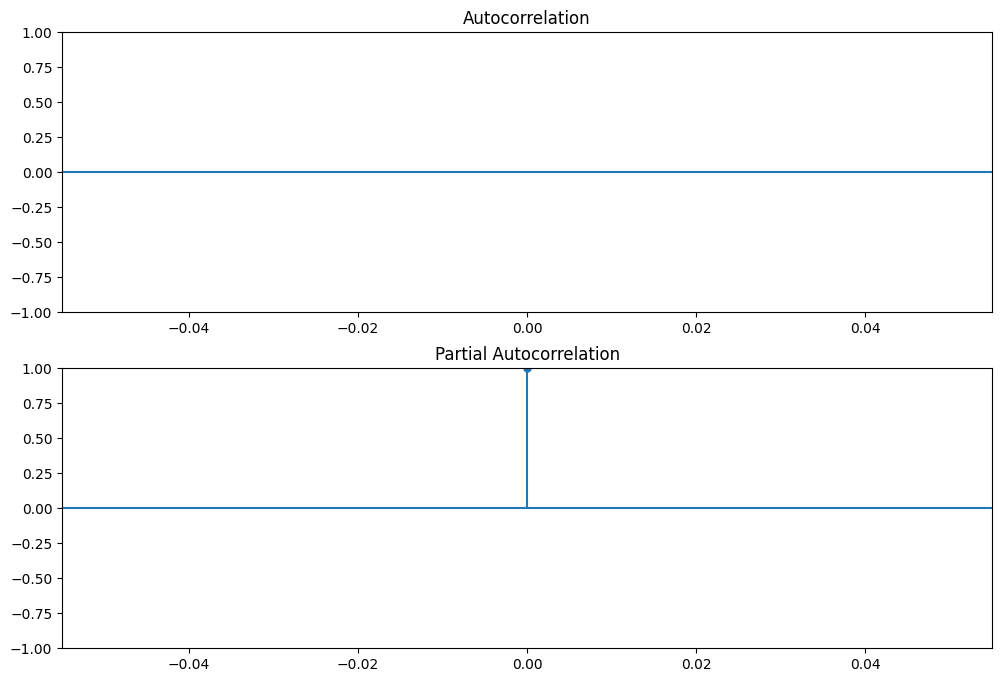

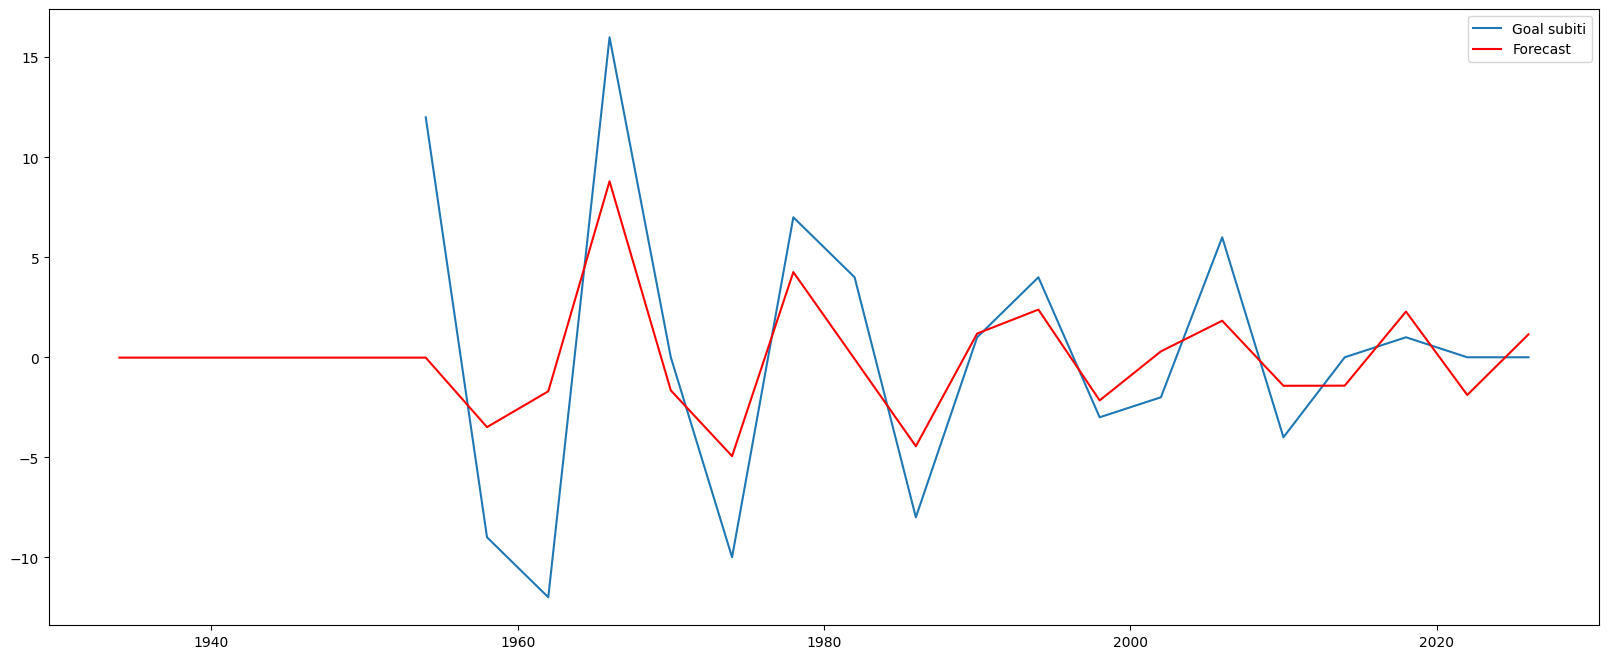

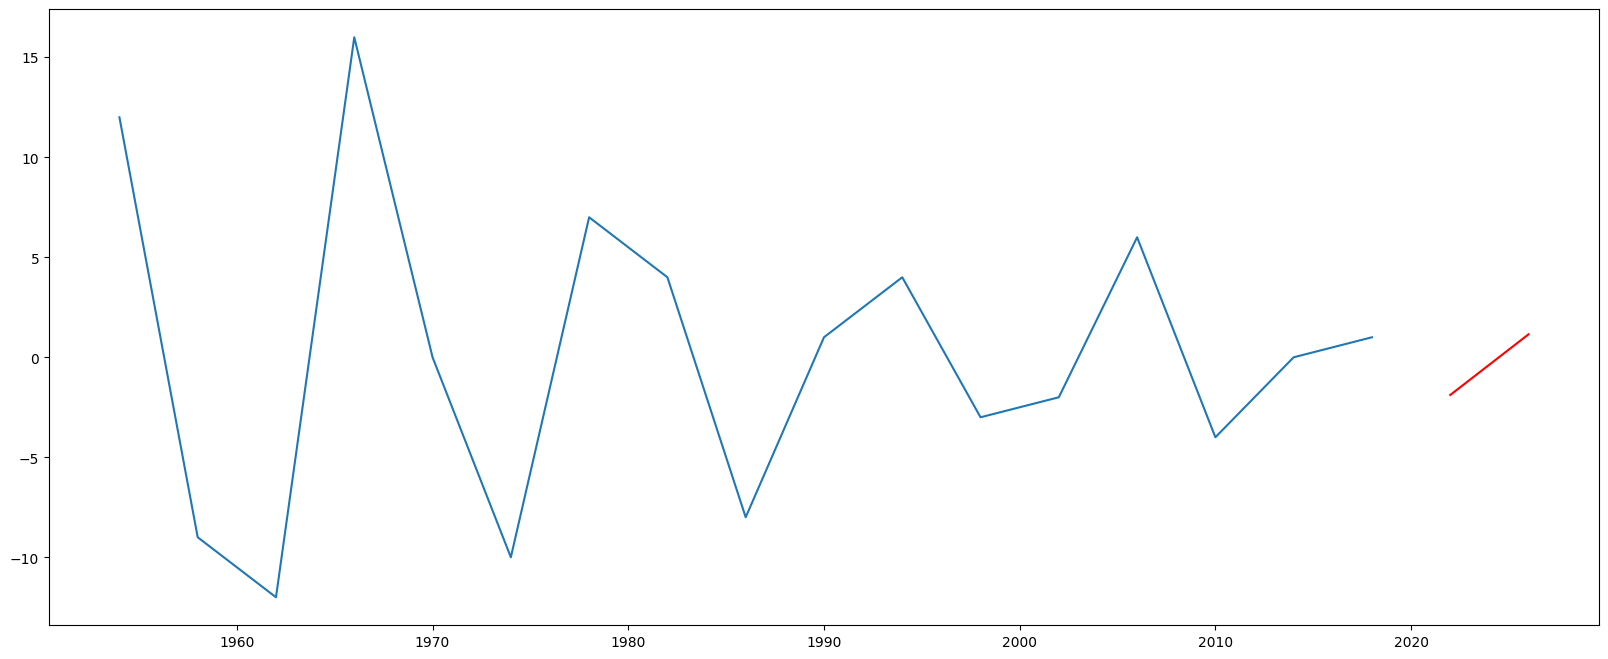

In [18]:
## GERMANY (GOAL SUBITI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_germany = df_team_goals[df_team_goals.team_name.eq('Germany')].reset_index()
df_west = df_team_goals[df_team_goals.team_name.eq('West Germany')].reset_index()
df_team_goals_Ger = pd.concat([df_germany, df_west], axis=0)
df_team_goals_Ger['team_name'] = df_team_goals_Ger['team_name'].replace(['West Germany'], 'Germany')
df_team_goals_Ger.drop(['index'], axis=1, inplace=True)
df_team_goals_Ger.set_index(df_team_goals_Ger['year'], inplace=True)
df_team_goals_Ger.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger = df_team_goals_Ger.sort_index()

df_team_goals_Ger = df_team_goals_Ger.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

df_team_goals_Ger['diff'] = df_team_goals_Ger['goal_subiti'] - df_team_goals_Ger['goal_subiti'].shift(1)
df_team_goals_Ger['diff2'] = df_team_goals_Ger['diff'] - df_team_goals_Ger['diff'].shift(1)
test_stationarity(df_team_goals_Ger['goal_subiti'].dropna(inplace=False))
test_stationarity(df_team_goals_Ger['diff'].dropna(inplace=False))
test_stationarity(df_team_goals_Ger['diff2'].dropna(inplace=False))

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_Ger['diff2'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_Ger['diff2'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_Ger['diff2'], order=(1,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_Ger['diff2'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Goal subiti', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_Ger['diff2'])
x = results.predict(start=(19), end=(20), dynamic=False)

plt.plot(df_team_goals_Ger['diff2'][:19])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_Ger['diff2'])

Test Statistic          -2.114753
p-value                  0.238624
Lags                     8.000000
Observations            12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  cards   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -49.147
Date:                Tue, 27 Dec 2022   AIC                            110.294
Time:                        15:53:13   BIC                            116.561
Sample:                             0   HQIC                           111.654
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

{'mape': inf,
 'me': -0.05550640771342617,
 'mae': 2.0968712613444054,
 'mpe': inf,
 'rmse': 2.6126277302097334,
 'corr': 0.8657456467201329,
 'minmax': 0.4123406605145189,
 'acf': -0.021361188248077506}

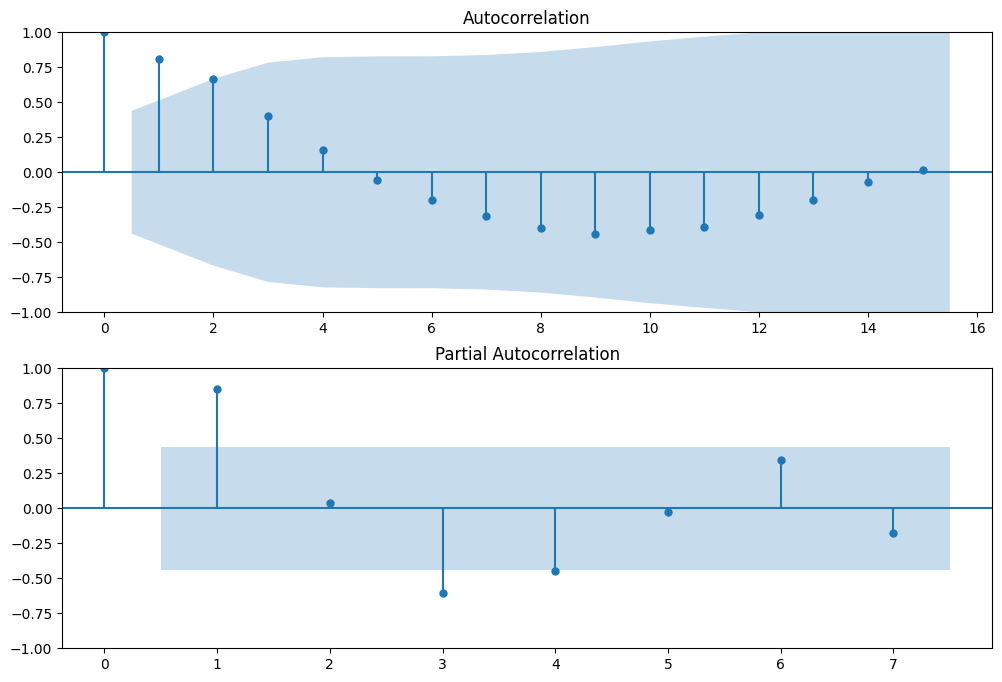

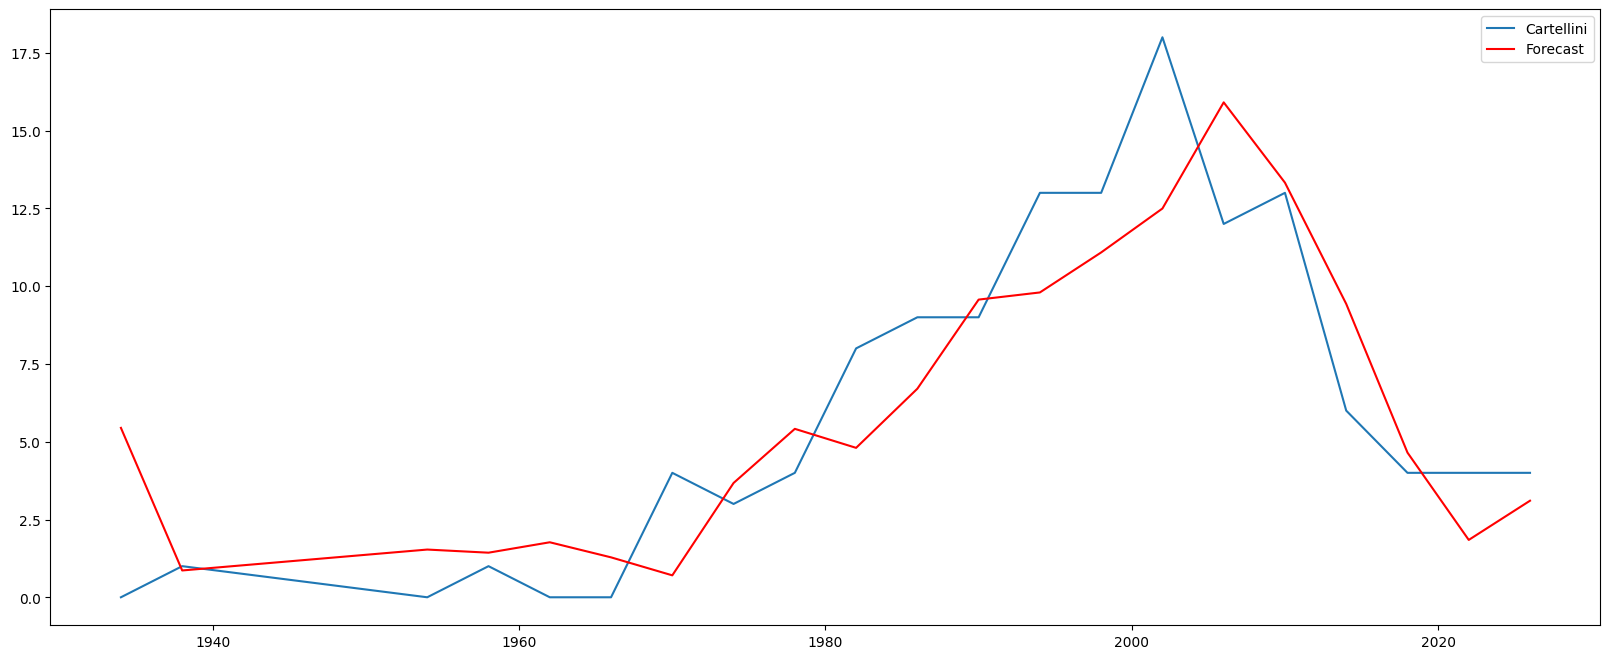

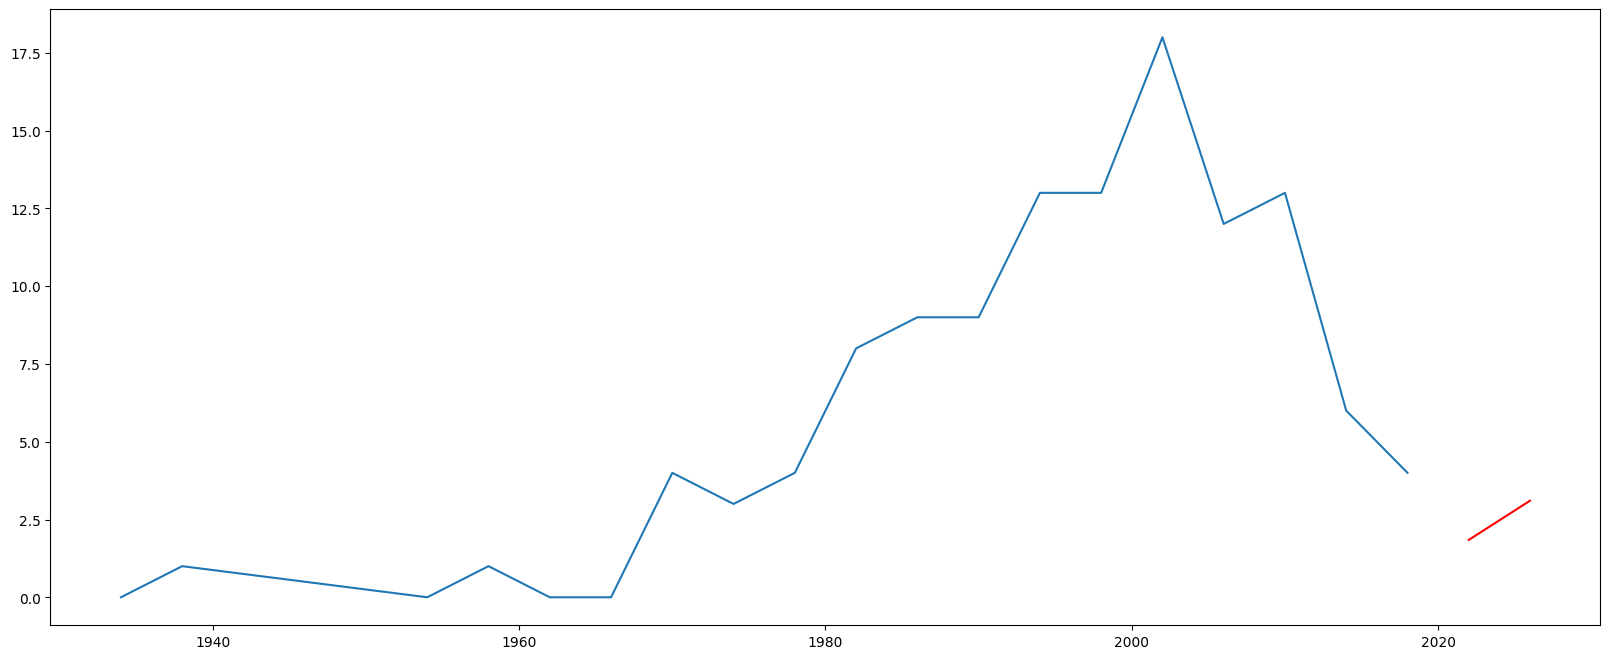

In [17]:
## GERMANY (CARTELLINI)
df_team_goals = pd.read_csv("./etl_Simone/team_goals.csv")

df_germany = df_team_goals[df_team_goals.team_name.eq('Germany')].reset_index()
df_west = df_team_goals[df_team_goals.team_name.eq('West Germany')].reset_index()
df_team_goals_Ger = pd.concat([df_germany, df_west], axis=0)
df_team_goals_Ger['team_name'] = df_team_goals_Ger['team_name'].replace(['West Germany'], 'Germany')
df_team_goals_Ger.drop(['index'], axis=1, inplace=True)
df_team_goals_Ger.set_index(df_team_goals_Ger['year'], inplace=True)
df_team_goals_Ger.loc[2022]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger.loc[2026]=[None, None, None, None, None, None, -1, None]
df_team_goals_Ger = df_team_goals_Ger.sort_index()

df_team_goals_Ger = df_team_goals_Ger.interpolate()

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

test_stationarity(df_team_goals_Ger['cards'])

# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_team_goals_Ger['cards'][1:], lags=15, ax=ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_team_goals_Ger['cards'][1:], lags=7, ax=ax2)

# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df_team_goals_Ger['cards'], order=(2,0,2)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df_team_goals_Ger['cards'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Cartellini', 'Forecast'])

print(results.summary())

# forecast quick and dirty
fig = plt.figure(figsize=(20,8))
num_points = len(df_team_goals_Ger['cards'])
x = results.predict(start=(19), end=(20), dynamic=False)

plt.plot(df_team_goals_Ger['cards'][:19])
plt.plot(x, color='r')

forecast_accuracy(results.fittedvalues, df_team_goals_Ger['cards'])